In [1]:
!pip install numpy pandas seaborn matplotlib scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.6/11.1 MB 14.3 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.1 MB 5.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 6.3 MB/s eta 0:00:02
   ------------- -------------------------- 3.7/11.1 MB 6.3 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.1 MB 4.4 MB/s eta 0:00:02
   ------------------- -------------------- 5.5/11.1 MB 4.5 MB/s eta 0:00:02
   -------------------- ------------------- 5.8/11.1 MB 3.9 MB/s eta 0:00:02
   --------------------------- ------------ 7.6/11.1 MB 4.5 MB/s eta 0:00:01
   ---------------------------- ----------- 7.9/11.1 MB 4.6 MB/s eta 0:00:01
   ------------------------------ --------- 8.4/11.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------------- ---- 10.0/11.1 MB 4.3 MB/s eta 0:00:01
   ------------------------------------ --- 10.2/11.1 MB 4.4 MB/s eta 0:00:01
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier


In [3]:
#confusion matrix

def plot_confusion_matrix(y, y_predict, method):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax); # annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(f'Confusion Matrix - {method}'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); 
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show()


In [4]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)

data.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(URL2)

X.head(100)


,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [6]:
Y = data['Class'].to_numpy()
Y


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X


array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print('Entire dataset size:', X.shape)
print('Train set size:', X_train.shape, Y_train.shape)
print('Test set size:', X_test.shape, Y_test.shape)


Entire dataset size: (90, 83)
Train set size: (72, 83) (72,)
Test set size: (18, 83) (18,)


Fitting 10 folds for each of 3 candidates, totalling 30 fits
Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Accuracy: 0.8464285714285713
Score Logistic Regression: 0.83333


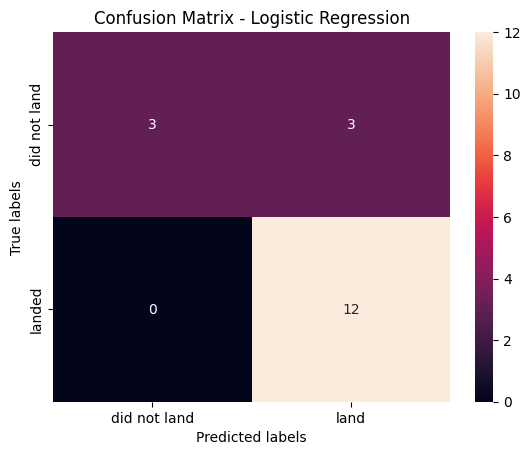

In [9]:
parameters = {'C':[0.01,0.1,1],
              'penalty':['l2'],
              'solver':['lbfgs']}

lr = LogisticRegression()

logreg_cv = GridSearchCV(estimator=lr, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1, verbose=2)
logreg_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", logreg_cv.best_params_)
print("Accuracy:", logreg_cv.best_score_)

lr_score = logreg_cv.score(X_test, Y_test)
print('Score Logistic Regression:', round(lr_score, 5))

yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'Logistic Regression')


Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.8767857142857143
Score Decision Tree: 0.83333


c:\Users\Chiranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2037 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Chiranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Chiranjan\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~

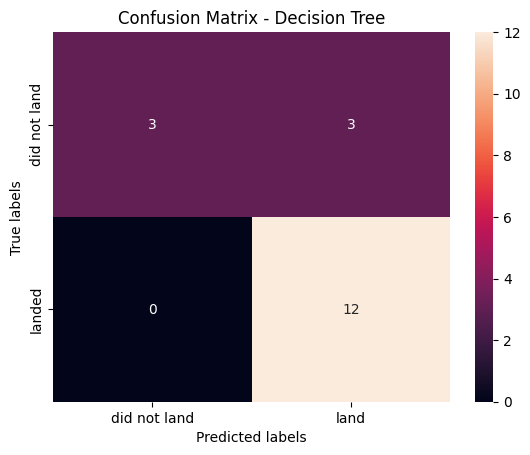

In [10]:
parameters = {'criterion': ['gini', 'entropy'],
              'splitter': ['best', 'random'],
              'max_depth': [2*n for n in range(1,10)],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
tree_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", tree_cv.best_params_)
print("Accuracy:", tree_cv.best_score_)

tree_score = tree_cv.score(X_test, Y_test)
print('Score Decision Tree:', round(tree_score, 5))

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'Decision Tree')


Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
Accuracy: 0.8482142857142858
Score kNN: 0.83333


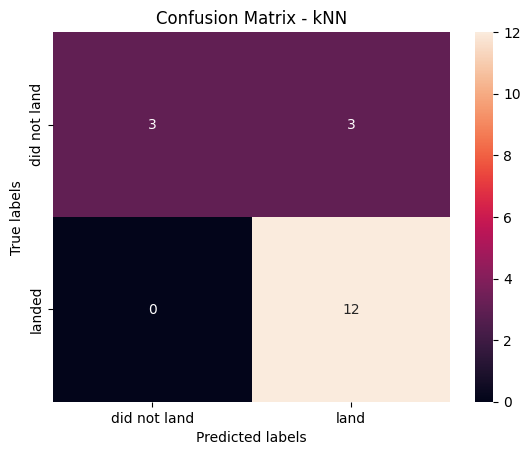

In [11]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

KNN = KNeighborsClassifier()

knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters, scoring='accuracy', cv=10, n_jobs=-1)
knn_cv.fit(X_train, Y_train)

print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Accuracy:", knn_cv.best_score_)

knn_score = knn_cv.score(X_test, Y_test)
print('Score kNN:', round(knn_score, 5))

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat, 'kNN')


In [12]:
classification_method = []
classification_accuracy = []

classification_method.append('Logistic Regression')
classification_accuracy.append(lr_score)

classification_method.append('Support Vector Machine')
classification_accuracy.append(svm_score)

classification_method.append('Decision Tree')
classification_accuracy.append(tree_score)

classification_method.append('kNN')
classification_accuracy.append(knn_score)

method_comparison = pd.DataFrame({'Method': classification_method, 'Accuracy': classification_accuracy})

plt.figure(figsize=(10,8))
sns.barplot(x='Method', y='Accuracy', data=method_comparison)
plt.tight_layout()
plt.show()


NameError: name 'svm_score' is not defined